<a href="https://colab.research.google.com/github/PreethaBansi/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Cardiovascular Risk Prediction**

## **Project Type:- Machine Learning - Classification**

## **Contribution:- Individual**

##**Project Summary:-**

##The dataset on Cardivascular Risk Prediction is based on a study conducted in Massachusettes. Cardiovascular risks are at an all time high considering the fact that this dataset has entries of patients as young as 32.

##The dataset provides the patient's information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor.There are both demographic,behavioral and medical risk factors.

##The Exploratory Data Analysis(EDA) of this dataset helped explain the basic comparison of the data presented, like the range of ages in the patient records and a history of Diabetes in the patient.

##Splitting the dataset into Train and Test sets comes next, followed by Model Building.

##The following models are used to determine the best use cases of this dataset:-
##> Random Forest Classifier
##> Decision Tree Classifier
##> K-Nearest Neighbour

##One of the attributes in this dataset is the 'TenYearCHD'. This attribute helps us predict the patients that may need to be aware of their chances of having a Coronary Heart Disease in the future and get appropriate help, thus making this dataset very useful.

##**GitHub Link :-**

# **Problem Statement - Business Context**
## The dataset is from an existing cardiovascular study on residents of the town of Framingham, Massachusettes. The classification goal is to predict whether the patient has a 10-year risk of future Coronary Heart Disease(CHD).

## **1.IMPORTING LIBRARIES**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

## **2.MOUNTING AND LOADING THE DATASET**

In [2]:
#mounting and loading the dataset
df = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

##**3.UNDERSTANDING THE DATASET**

In [3]:
#understanding rows and columns
df.shape

(3390, 17)

## **The dataset contain**
## No of rows = 3390
## No of columns = 17

In [4]:
#dataset first look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#dataset first look
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
#stating the columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
#dataset describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
#dataset duplicate value count
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [10]:
df.duplicated().sum()

0

## This shows us that there are 0 duplicated rows in the Cardiovascular Risk Prediction dataset.

In [11]:
#dataset null values count
df.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

## The dataset contains NaN values in the following columns

*   Glucose
*   Education

*   BPMeds
*   totChols   

*   cigsPerDay
*   BMI

*   heartRate   













In [12]:
#Creating a copy of the dataset before making changes
cvrp_df = df.copy()

In [13]:
cvrp_df = cvrp_df.fillna(0)

In [14]:
cvrp_df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##3. Data Description and Attributes ~

##id: Patient Identification Number.

##*Demographic*:

##> Sex: Male or Female("M" or "F")
##> Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

##*Behavioral*:

##> is_smoking: Whether or not the patient is a current smoker ("YES" or "NO")
##> Cigs Per Day: The number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

##*Medical History(Past)*:

##> BP Meds: Whether or not the patient was on blood pressure medication (Nominal)
##> Prevalent Stroke: Whether or not the patient had previously had a stroke (Nominal)
##> Prevalent Hyp: Whether or not the patient was hypertensive (Nominal)
##> Diabetes: Whether or not the patient had diabetes (Nominal)

##*Medical History(Current)*:

##> Tot Chol: Total Cholesterol Level (Continuous)
##> Sys BP: Systolic Blood Pressure (Continuous)
##> Dia BP: Diastolic Blood Pressure (Continuous)
##> BMI: Body Mass Index (Continuous)
##> Heart Rate: Heart Rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
##> Glucose: glucose level (Continuous)

##*Dependent variable (desired target)*:

##10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

## **4.EXPLORATORY DATA ANALYSIS(EDA)**

##1.Range of education of patients in the dataset.

In [15]:
# Counting the number of patients in each education group.
cvrp_df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
0.0      87
Name: education, dtype: int64

Text(0.5, 1.0, 'Education Proposionate')

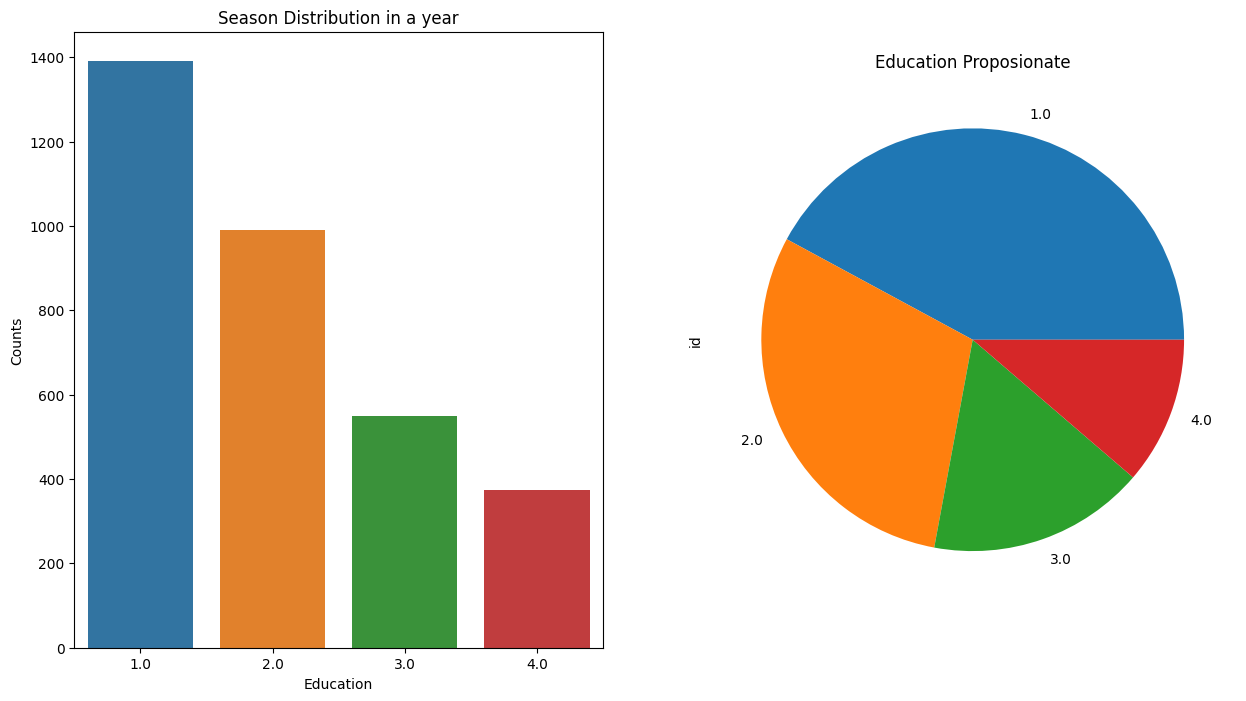

In [16]:
# Plotting the bar graph and pie chart of the educational status of patients.
fig, ax = plt.subplots(1,2,figsize=(15,8))
ax1=plt.subplot(1,2,1)
Education=pd.DataFrame(df.groupby(['education'])['id'].count())
sns.barplot(x=Education.index,y=Education['id'])
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('Season Distribution in a year')

ax2=plt.subplot(1,2,2)
df.groupby(['education'])['id'].count().plot(kind='pie')
plt.title('Education Proposionate')

##Inference
##The highest proportion of patients in the dataset have a Tier 1 eduction.

##2. Age range of Patients.

In [17]:
# Counting the number of patients in each age group.
cvrp_df['age'].value_counts()

40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64

Text(0, 0.5, 'Counts')

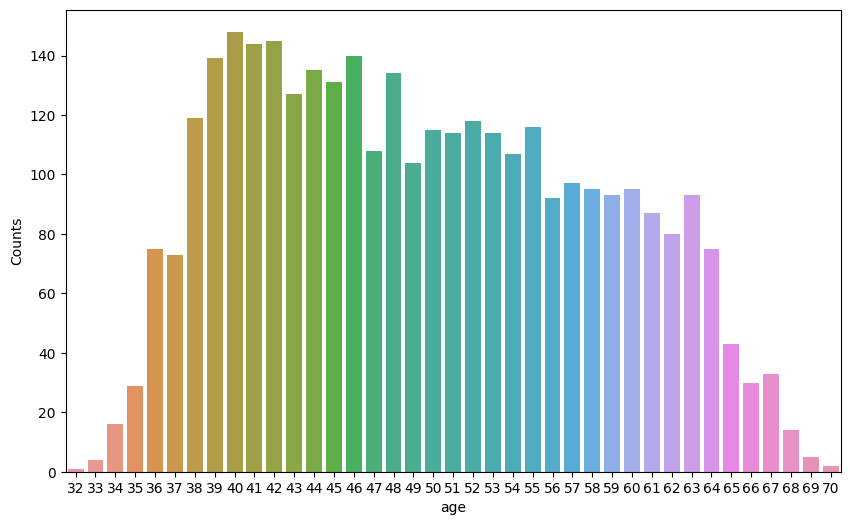

In [18]:
# Plotting the bar graph with the age of patients.
fig, ax = plt.subplots(figsize=(10,6))
age=pd.DataFrame(df.groupby(['age'])['id'].count())
sns.barplot(x=age.index,y=age['id'])
plt.ylabel('Counts')

##Inference
##The age of people in this dataset is ranging from 32 to 70 year old people.
##This graph shows us that people as young as 32 are succeptible to Coronary Heart Disease or Cardiovascular Risks.

In [19]:
cvrp_df.drop(['id'],axis=1,inplace=True)

##3. Gender of patients in the dataset.

In [20]:
# Counting the number of males and females.
cvrp_df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

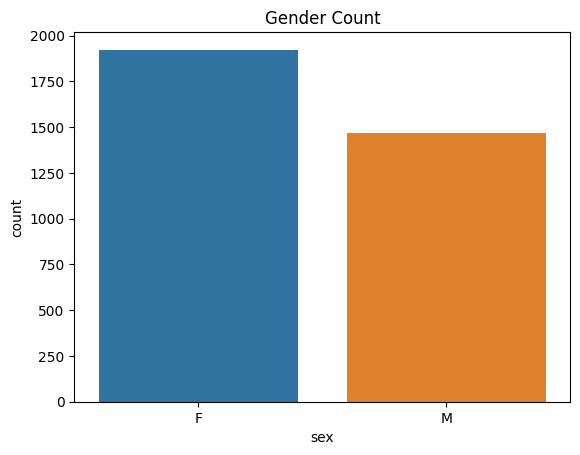

In [21]:
# Plotting the bar graph with number of males and females.
sns.countplot(x = df['sex']).set(title='Gender Count')
plt.show()

##Inference
##The graph above shows that the number of females is higher than than males in this dataset of Cardiovascular Risk Prediction.

##4. People who have a risk of Coronary Heart Disease.

In [22]:
# Counting the total number of people who have a risk of CHD.
cvrp_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

##Here, '0' represents No Risk and '1' represents Risk of Coronary Heart Disease

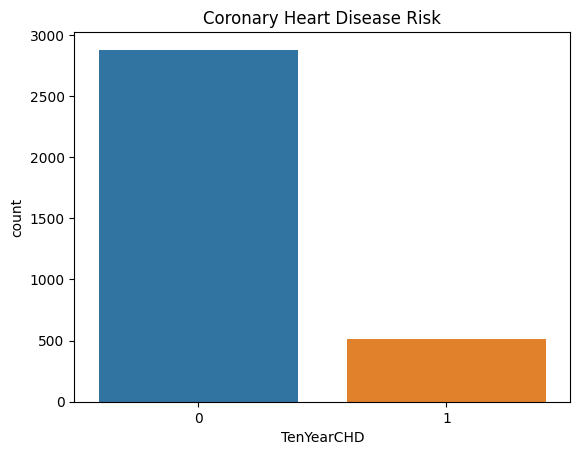

In [23]:
# Plotting number of patients at risk of CHD vs those whose results are normal.
sns.countplot(x = df['TenYearCHD']).set(title='Coronary Heart Disease Risk')
plt.show()

##Inference
##This graph shows us that patients with no risk of CHD are extremely high compared to those with risk creating a case of class imbalance. In return this creates a case of overfitting with entries of normal patients and hence it becomes hard to predict a person with a disorder because the model would be biased for the other output.

##5. Number of Smokers.

In [24]:
# Counting the number of smokers in the dataset.
cvrp_df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

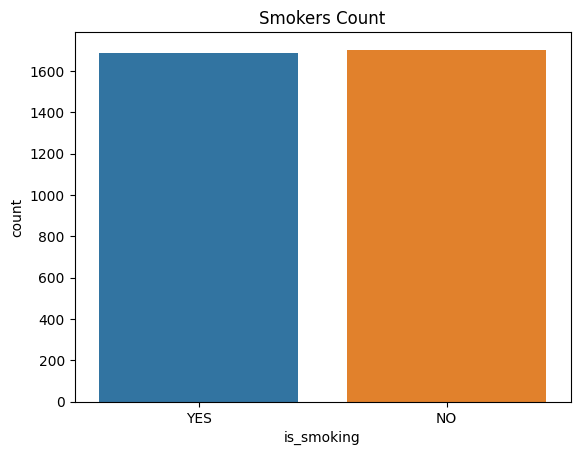

In [25]:
# Plotting the number of patients who are smokers.
sns.countplot(x = df['is_smoking']).set(title='Smokers Count')
plt.show()

##Inference
##The bar graph shows that the difference between smokers and non smokers in the dataset is very small.

##6. Number of patients who are Diabeic.

In [26]:
# Counting the number of diabetic patients
cvrp_df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

##Here, '0' represents Non-Diabetic patients and '1' represents Diabetic patients.

<function matplotlib.pyplot.show(close=None, block=None)>

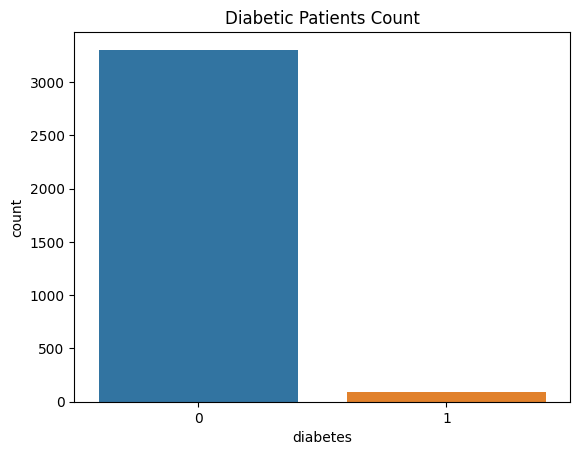

In [27]:
# Plotting the number of Diabetic patients vs Non-Diabetic patients.
sns.countplot(x = df['diabetes']).set(title='Diabetic Patients Count')
plt.show

##Inference
##The graph is a visual representation of how negligible the number of Diabetic patients are in comparison to Non-diabetic patients.
##Like the Risk of CHD in ten years graph,a case of overfitting of Non-diabetic patients occur.

##7.Categorical and Numerical Variables.

In [28]:
# Differentiating the numerical and categorical features
categorical_features = [i for i in cvrp_df.columns if cvrp_df[i].nunique()<=4]
numeric_features = [i for i in cvrp_df.columns if i not in categorical_features]

print("Following are the categorical features in this dataset:")
print(categorical_features)
print("Following are the numeric features in this dataset:")
print(numeric_features)

Following are the categorical features in this dataset:
['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Following are the numeric features in this dataset:
['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


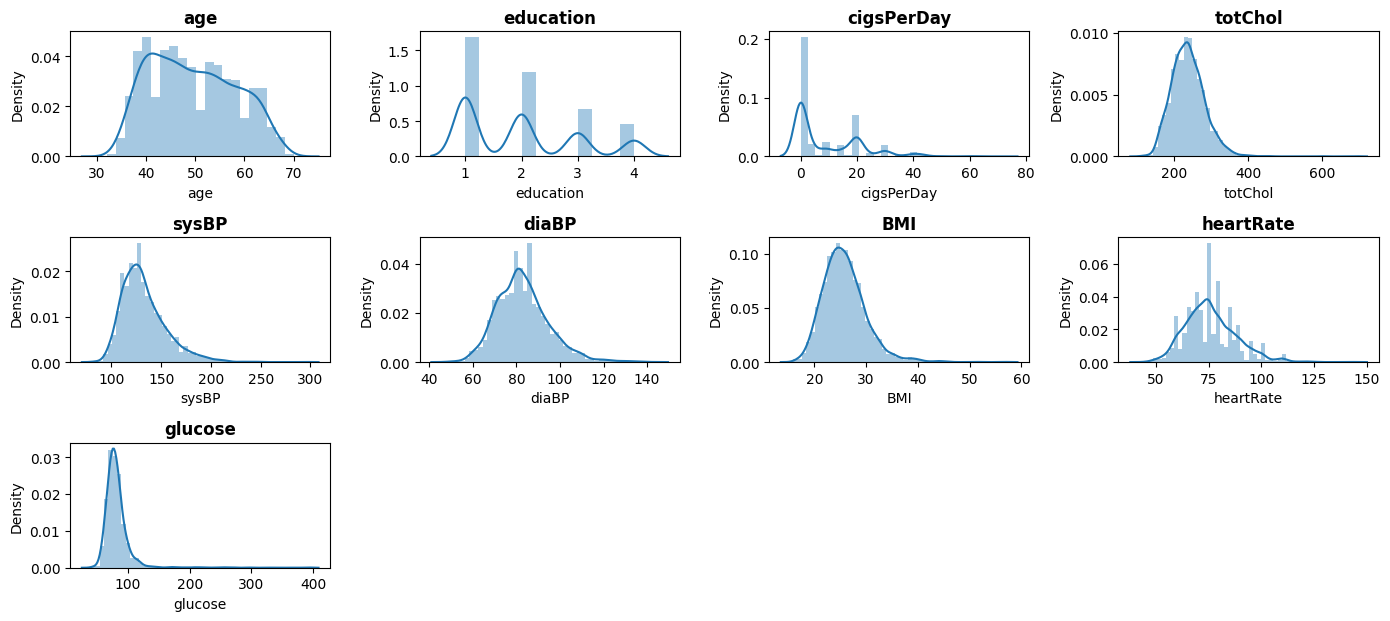

In [29]:
# Visualizing the distributions for numeric features and it's skewness.
# Defining figure.
plt.figure(figsize=(14,10))

# plotting subplots for all numeric features.
for i, column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.distplot(df[column])
  plt.title(f'{column}', weight='bold')
  plt.tight_layout()

##We can observe that most of the distributions are right skewed for numeric features. totChol (total cholesterol) and BMI have roughly similar distributions, which depicts a linear dependency. Glucose have a highly right skewed distribution, this might lead to some biasness. It shows Glucose has a lotof outliers. Though it is usually a good practice to deal with such outliers. However, in this case we can't do much about it.
##The data is taken through medical survey and the values are patient's health stats, hence those values are absolute and we should not manipulate them by any means.

##8. Outlier Distribution in Numeric variables.

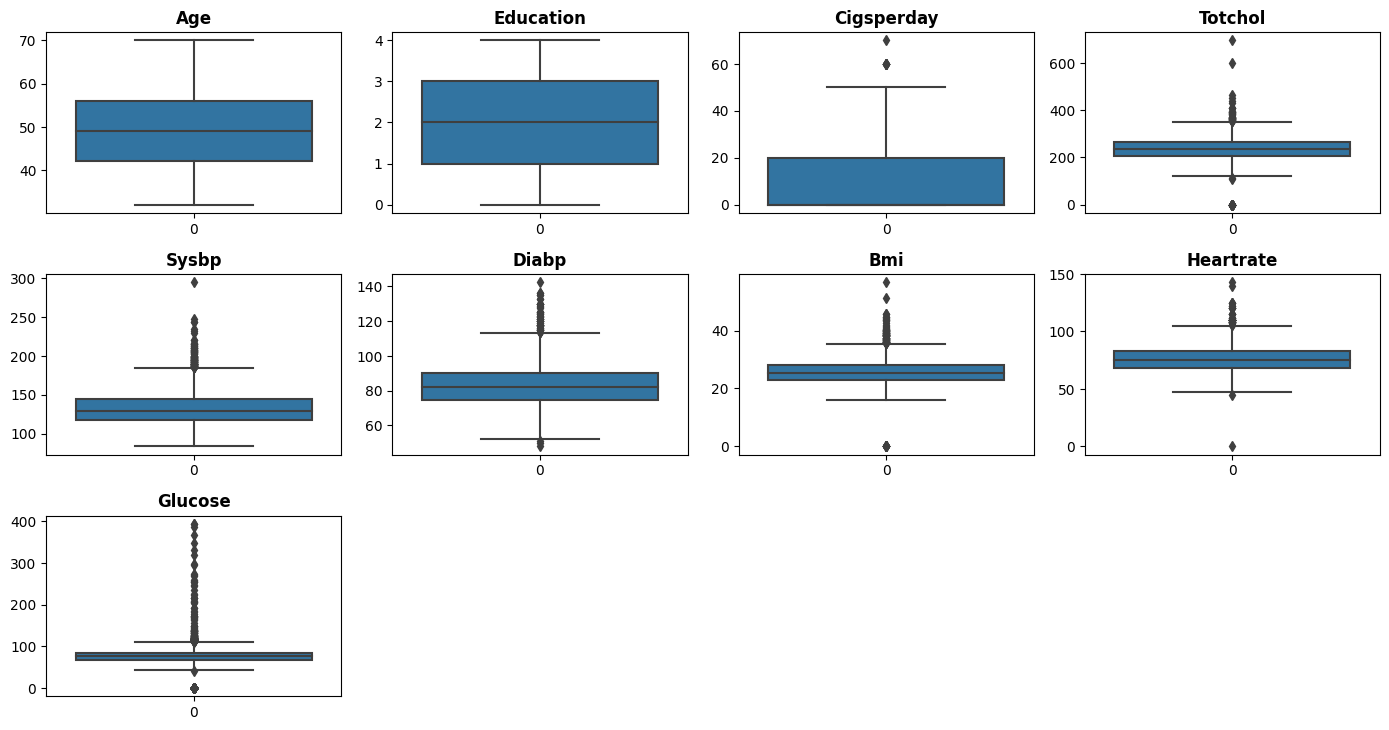

In [30]:
# Box plot distributions for numeric features and it's outlier occurence.
plt.figure(figsize=(14,12))

# Plotting subplots for every numeric feature.
for i,column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.boxplot(cvrp_df[column])
  plt.title(f'{column.title()}', weight='bold')
  plt.tight_layout()

##We can see a lot of outliers in columns like, Totchol, SysBP, DiaBP, BMI, Glucose, etc. As stated before we should not manipulate data in such way that we change the original patient stats, neither should we entirely drop those entries with outliers. This will lead to huge amount of data loss. We would lose meaningful data in order to achieve this.
##The best solution to this could only be, to drop the rows with such outliers with minimal data loss.

In [31]:
# Dropping rows with borderline outliers.
# Dropping rows with Cigarette per day greater than 50.
cvrp_df = cvrp_df[cvrp_df["cigsPerDay"] <= 50]

In [32]:
# Dropping rows with DiaBp greater than 140.
cvrp_df = cvrp_df[cvrp_df['diaBP'] <= 140]

In [33]:
# Dropping rows with SysBP greater than 250.
cvrp_df = cvrp_df[cvrp_df['sysBP'] <= 250]

In [34]:
# Dropping rows with BMI greater than 50.
cvrp_df = cvrp_df[cvrp_df['BMI'] <= 50]

In [35]:
# Dropping rows with heart rate greater than 130.
cvrp_df = cvrp_df[cvrp_df["heartRate"] <= 130]

In [36]:
# Dropping rows with glucose greater than 300.
cvrp_df = cvrp_df[cvrp_df["glucose"] <= 300]

In [37]:
# Dropping rows with total cholesterol greater than 500.
cvrp_df = cvrp_df[cvrp_df["totChol"] <= 500]

In [38]:
# Generalized dataset.
cvrp_df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


##9. Univariate Analysis.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>],
       [<Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>],
       [<Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>],
       [<Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>, <Axes: >, <Axes: >]],
      dtype=object)

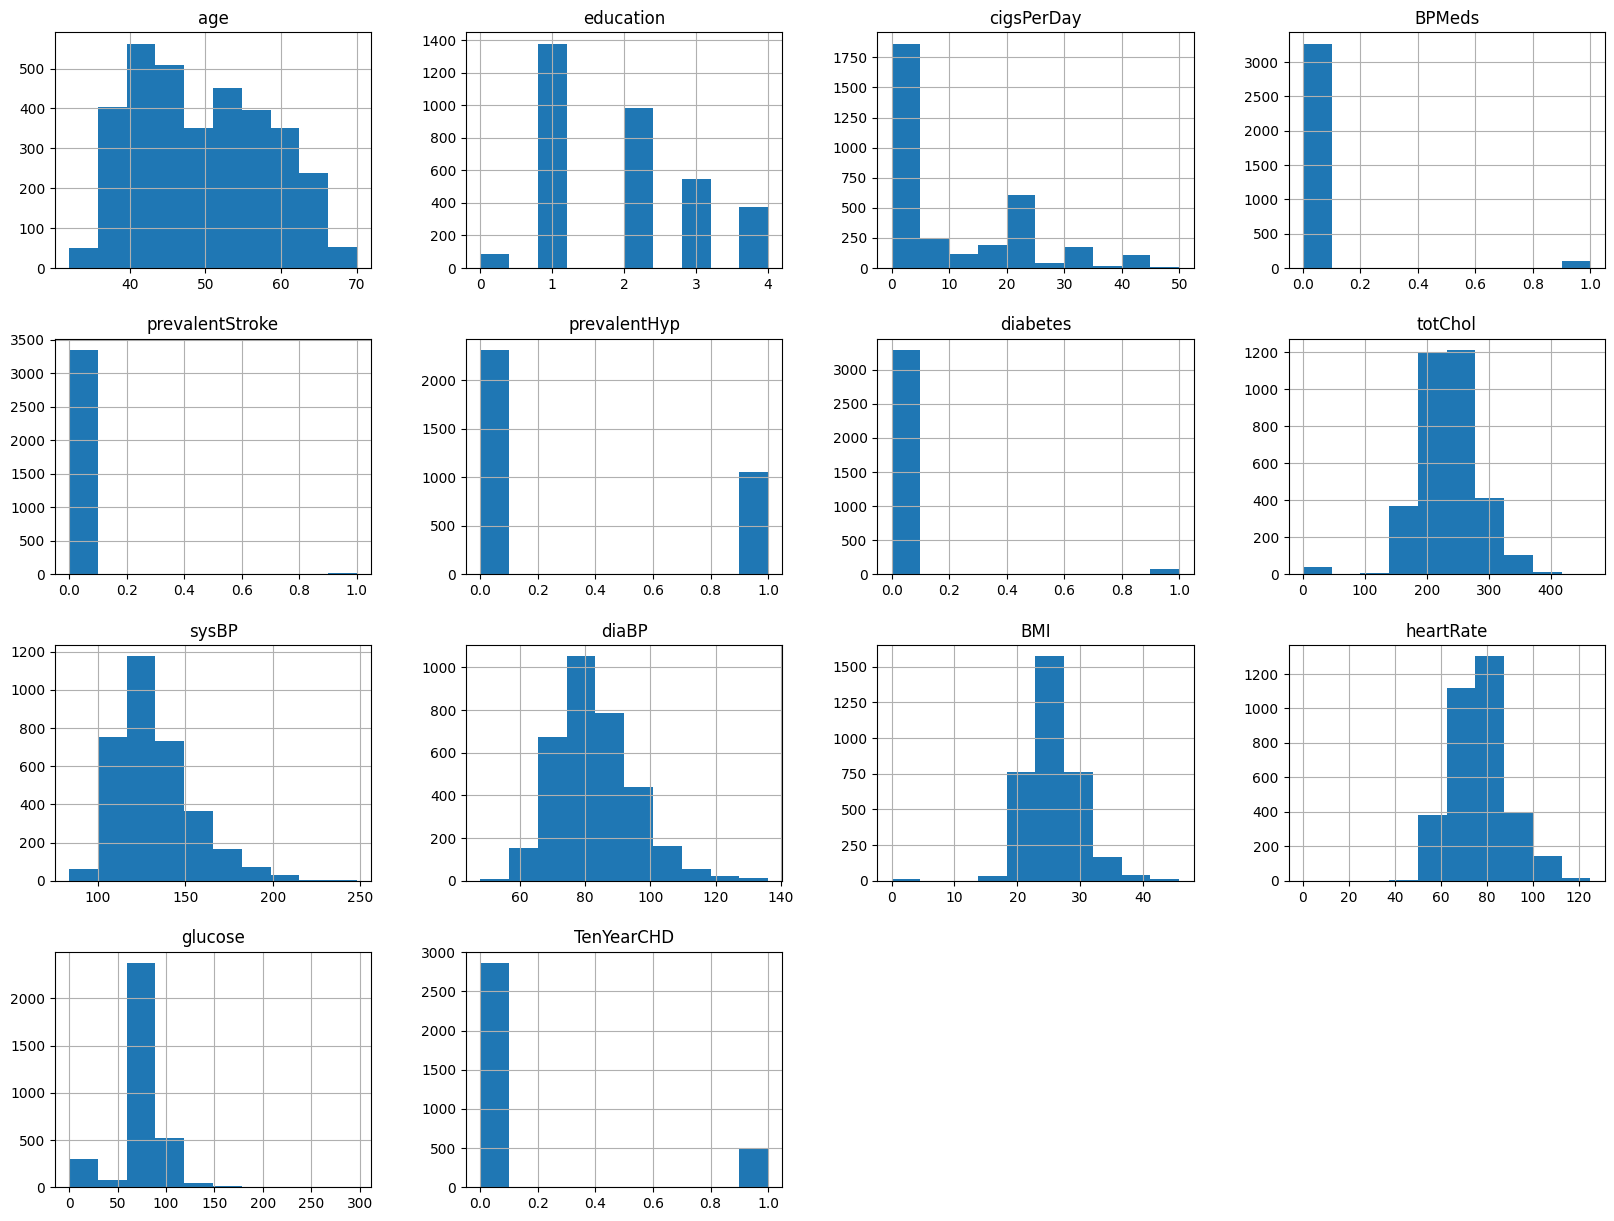

In [39]:
# Plotting the distribution of each numeric variable.
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
cvrp_df.hist(ax = ax)

##Inference
##The univariate analysis shows us the distribution of each variable in the dataset.

##10. Multivariate Analysis.

<Axes: >

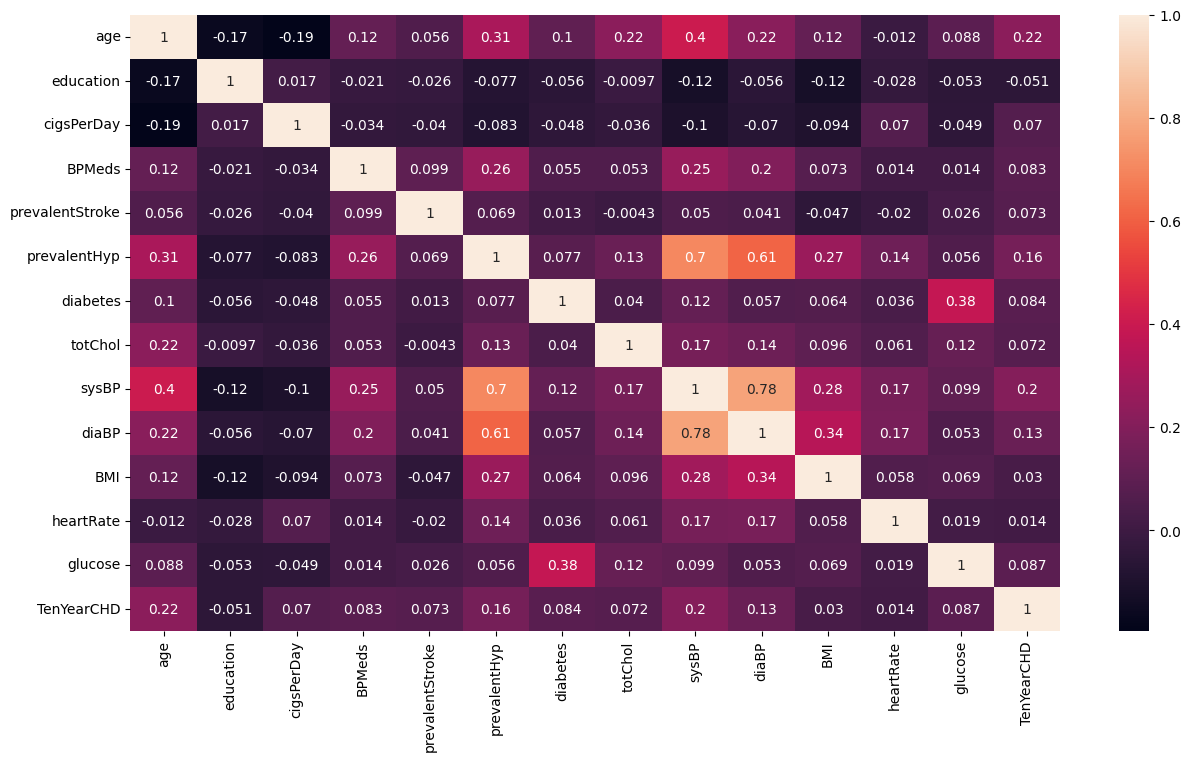

In [40]:
# Plotting the correlation of variables.
plt.figure(figsize=(15,8))
correlation = cvrp_df.corr()
sns.heatmap(correlation, annot=True)

##Inference
##The heatmap above shows us the correlation of one variable to the other.
##This heatmap shows us that the variables 'sysBP' and 'diaBP' are highly correlated.

In [41]:
cvrp_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [42]:
# Converting the string 'is_smoking' into binary code('0' for non smokers and '1' for smokers).
cvrp_df['is_smoking'].replace({'YES':1, 'NO':0}, inplace=True)

In [43]:
# Converting the string 'sex' into binary code('0' for Male and '1' for Female).
cvrp_df['sex'].replace({'F':1, 'M':0}, inplace=True)

##**Spliting the dataframe into Train Test sets.**

In [44]:
# Data for all the independent variables
X = cvrp_df.drop(labels='TenYearCHD',axis=1)

# Data for the dependent variable
y = cvrp_df['TenYearCHD']

In [45]:
# Splitting the dataset into Train and Test models
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state =101, stratify=y)
print(X_train.shape)
print(X_test.shape)

(2524, 15)
(842, 15)


##**Model Building**

##Random Forest.

In [46]:
# Initiating Random Forest Classifier
classifier = RandomForestClassifier()

# For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}
GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
GSclassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [47]:
# Calculating the parameters
bestvalues=GSclassifier.best_params_
GSclassifier.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [48]:
classifier = RandomForestClassifier(max_depth=bestvalues['max_depth'],n_estimators=bestvalues['n_estimators'])
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [49]:
y_train_preds_rf =  classifier.predict(X_train)
y_test_preds_rf= classifier.predict(X_test)

In [50]:
# Obtain accuracy on train set
accuracy_score(y_train,y_train_preds_rf)

0.8561806656101426

In [51]:
# Obtain accuracy on test set
accuracy_score(y_test,y_test_preds_rf)

0.8527315914489311

In [52]:
y_rf_predict_pro=classifier.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_predict_pro)

In [53]:
roc_auc_score(y_test,y_rf_predict_pro)

0.7657126917712691

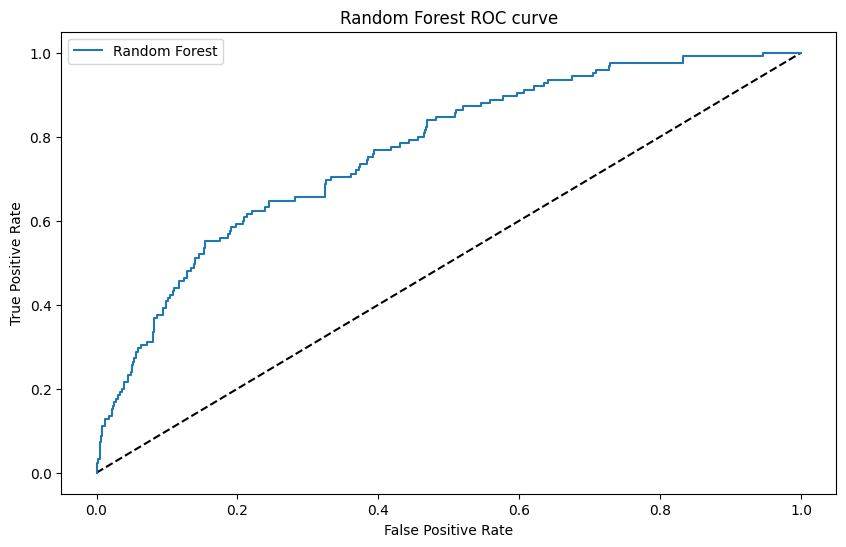

In [54]:
plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend()
plt.show()

##Decision Tree.

In [55]:
# Distribution in training set
y_train.value_counts(normalize=True)

0    0.85103
1    0.14897
Name: TenYearCHD, dtype: float64

In [56]:
# Distribution in validation set
y_test.value_counts(normalize=True)

0    0.851544
1    0.148456
Name: TenYearCHD, dtype: float64

In [57]:
# Creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [58]:
# Fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [59]:
# Checking the training score
dt_model.score(X_train, y_train)

1.0

In [60]:
# Checking the validation score
dt_model.score(X_test, y_test)

0.7541567695961995

In [61]:
# Predictions on validation set
dt_model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
dt_model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [63]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [64]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [65]:
accuracy_score(y_test, y_new)

0.7541567695961995

In [66]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [67]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':validation_accuracy})
frame.head(10)

,max_depth,train_acc,test_acc
0,1,0.851030,0.851544
1,2,0.853011,0.853919
2,3,0.854992,0.853919
3,4,0.856577,0.852732
4,5,0.862520,0.842043
5,6,0.871632,0.833729
6,7,0.882726,0.834917
7,8,0.893819,0.833729
8,9,0.904913,0.818290


Text(0, 0.5, 'performance')

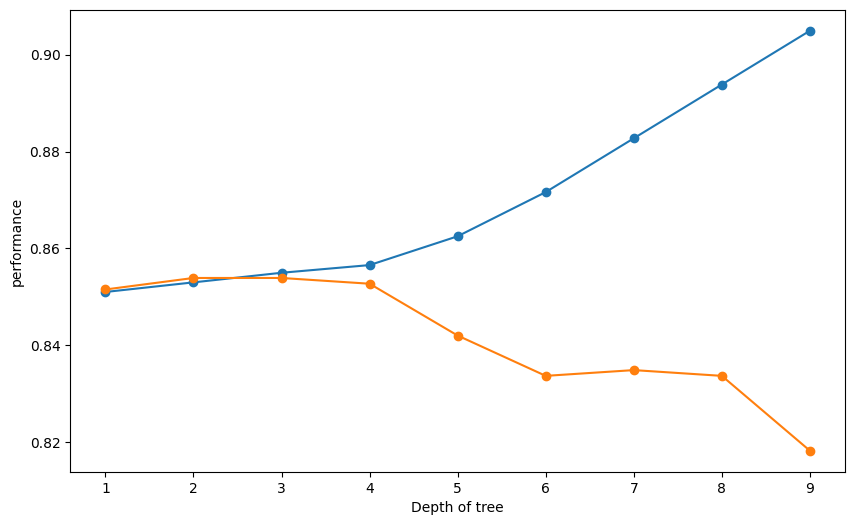

In [68]:
plt.figure(figsize=(10,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')

In [69]:
dt_model = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=25, random_state=10)

In [70]:
# Fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=25, random_state=10)

In [71]:
# Training score
dt_model.score(X_train, y_train)

0.8510301109350238

In [72]:
# Validation score
dt_model.score(X_test, y_test)

0.8515439429928741

In [73]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=5,filled=True)

In [74]:
!dot -Tpng tree.dot -o tree.png

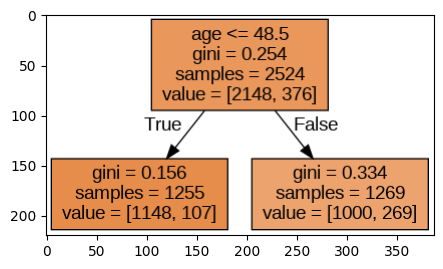

In [75]:
image = plt.imread('tree.png')
plt.figure(figsize=(5,5))
plt.imshow(image)

##K-Nearest Neighbour(KNN)



In [76]:
# Number of Neighbours
neighbors = np.arange(1,9)

# Setup arrays to store training and test accuracies
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

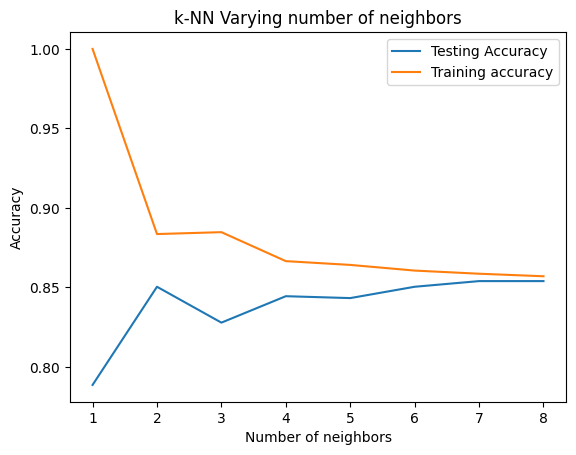

In [77]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [78]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=8)

In [79]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [80]:
knn.score(X_test,y_test)

0.8539192399049881

In [81]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [82]:
confusion_matrix(y_test,y_pred)

array([[713,   4],
       [119,   6]])

In [83]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

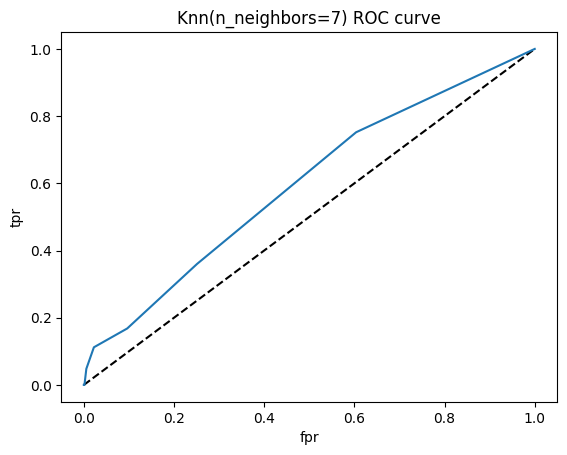

In [85]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [86]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5958270571827058

In [87]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [88]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [89]:
knn_cv.best_score_

0.8529406836830524

In [90]:
knn_cv.best_params_

{'n_neighbors': 10}

##**Conclusion**

##From the Exploratory Data Analysis(EDA) and Model Building processes followed above, we can conclude he following:-
##> The dataset contains a age range from 32 to 70 year old people.
##> The dataset contained outliers in the 'Risk of Coronary Heart Disease in Ten years' and 'Diabetic patients vs Non-Diabetic patients' variables which were treated.
##> The following columns lie in the range:
##totChol: 150 to 300 , sysBP: 100 to 150, diaBP: 60 to 100 ,BMI: 20 to 30, heartRate: 50 to 100 glucose: 50 to 150.
##> Males have shown a slightly higher risk of coronary heart disease in TenYearCHD.
##> Low cigsPerDay comes with lower risk of CHD.
##> Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease.
##> Minor relation of higher risk of TenYearCHD found with higher sysBP AND higher diaBP.
##> Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease.
##> Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.


##Thus, Age, Total Cholesterol Level, Diastolic Blood Pressure, BMI, and Glucose Level are the main causes leading to heart diseases, especially Coronary Heart Disease(CHD). These models show that our analysis is highly accurate.
##Since Light GBM gives the best score in testing(95%) accuracy, we can trust on this model.


##**THANK YOU !!**